# A Hotel Problem

You work at a hospitality company that has many corporate customers who book hotel rooms for their employees. Your hospitality company noticed that they have quite a bit of churn in clients. They basically randomly assign account managers right now, but want you to create a machine learning model that will help predict which customers will churn (stop buying the rooms) so that they can correctly assign the customers most at risk to churn an account manager.

Luckily they have some historical data, can you help them out? Create a classification algorithm that will help classify whether or not a customer churned. Then your company can test this against incoming data for future customers to predict which customers will churn and assign them an account manager.

The data is saved as customer_churn.csv. Here are the fields and their definitions:

    Name : Name of the latest contact at Company
    Age: Customer Age
    Total_Purchase: Total Purchased
    Account_Manager: Binary 0=No manager, 1= Account manager assigned
    Years: Totaly Years as a customer
    Num_sites: Number of employees that use the service.
    Onboard_date: Date that the name of the latest contact was onboarded
    Location: Client HQ Address (Masked)
    Company: Name of Client Company (Masked)
    
Once you've created the model and evaluated it, test out the model on some new data that your hospitality company has provided, saved under new_customers.csv. Which new customers are most likely to churn given this data.

In [7]:
#Import your libraries, data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("./data/customer_churn.csv")
df = pd.DataFrame(data)
df.head()



,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [6]:
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


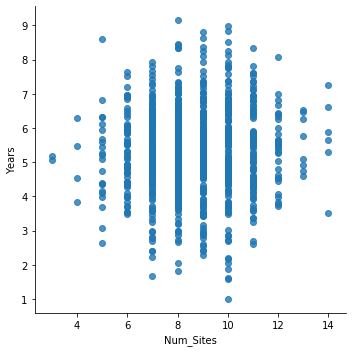

In [9]:
#Check out your data using at least 4 visualizations
x = df.Num_Sites
y = df.Years

sns.lmplot(x='Num_Sites', y='Years', data=df, ci=None, fit_reg=False);

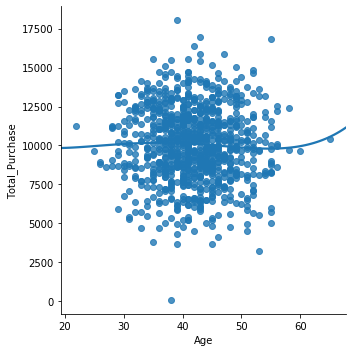

In [15]:
sns.lmplot(x='Age', y='Total_Purchase', data=df, ci=None, order=4);

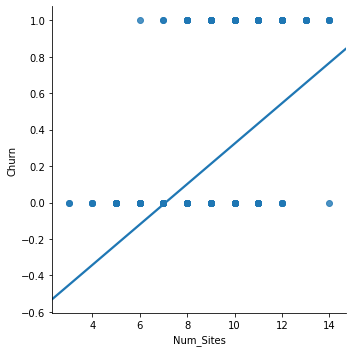

In [25]:
sns.lmplot(x='Num_Sites', y='Churn', data=df, ci=None);

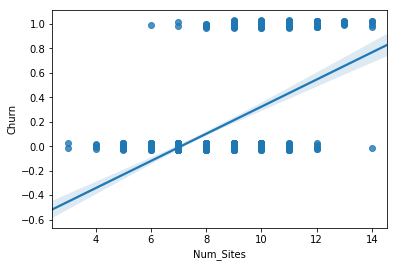

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

X = df.Num_Sites
y = df.Total_Purchase

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(y_train.shape)
print(y_test.shape)

(675,)
(225,)


## Create the Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Evaluate the results

In [41]:
# use classification report to explain how well your results are
## What is F1, and when would it be the best measure? 
from sklearn.metrics import classification_report

y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ["Age", "Churn", "Location"]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

         Age       0.50      1.00      0.67         1
       Churn       0.00      0.00      0.00         1
    Location       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



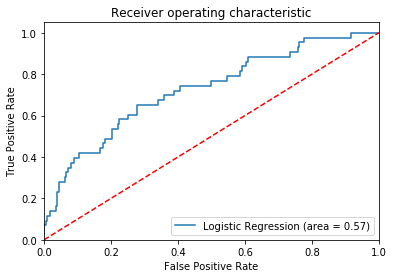

In [43]:
#Explain what AUC is, and create a score and visualization
#import the metrics for the AUC
from sklearn 


In [46]:
print(log_roc_auc)

0.573199467267698


[Common question - what is a good AUC value?](https://stats.stackexchange.com/questions/113326/what-is-a-good-auc-for-a-precision-recall-curve)

## Predict on unlabeled data
Who in the new customers might be at risk of churning? use new_customers.csv

In [71]:
#Import the new dataframe as new_customer


,Names,Age,Total_Purchase,Account_Manager,Years,Num_sites,Onboard_date,Location,Company,Ditch
0,Andrew Mccall,37.0,9935.53,1,7.71,8.0,2011-08-29 18:37:54,"38612 Johnny Stravenue Nataliebury, WI 15717-8316",King Ltd,NaN
1,Michele Wright,23.0,7526.94,1,9.28,15.0,2013-07-22 18:19:54,"21083 Nicole Junction Suite 332, Youngport, ME...",Cannon-Benson,NaN
2,Jeremy Chang,65.0,100.00,1,1.00,15.0,2006-12-11 07:48:13,"085 Austin Views Lake Julialand, WY 63726-4298",Barron-Robertson,NaN
3,Megan Ferguson,32.0,6487.50,0,9.40,14.0,2016-10-28 05:32:13,"922 Wright Branch North Cynthialand, NC 64721",Sexton-Golden,NaN
4,Taylor Young,32.0,13147.71,1,10.00,8.0,2012-03-20 00:36:46,Unit 0789 Box 0734 DPO AP 39702,Wood LLC,NaN


In [72]:
#Be sure you apply any transformations from above to this new_customers


In [78]:
#apply the "predict" to create a new feature in new_customers


,Names,Age,Total_Purchase,Account_Manager,Years,Num_sites,Onboard_date,Location,Company,Ditch,Risk
0,Andrew Mccall,37.0,9935.53,1,7.71,8.0,2011-08-29 18:37:54,"38612 Johnny Stravenue Nataliebury, WI 15717-8316",King Ltd,NaN,0
1,Michele Wright,23.0,7526.94,1,9.28,15.0,2013-07-22 18:19:54,"21083 Nicole Junction Suite 332, Youngport, ME...",Cannon-Benson,NaN,1
2,Jeremy Chang,65.0,100.00,1,1.00,15.0,2006-12-11 07:48:13,"085 Austin Views Lake Julialand, WY 63726-4298",Barron-Robertson,NaN,1
3,Megan Ferguson,32.0,6487.50,0,9.40,14.0,2016-10-28 05:32:13,"922 Wright Branch North Cynthialand, NC 64721",Sexton-Golden,NaN,1
4,Taylor Young,32.0,13147.71,1,10.00,8.0,2012-03-20 00:36:46,Unit 0789 Box 0734 DPO AP 39702,Wood LLC,NaN,0


In [82]:
#what companies should we give account managers too? 


,Names,Company,Location
1,Michele Wright,Cannon-Benson,"21083 Nicole Junction Suite 332, Youngport, ME..."
2,Jeremy Chang,Barron-Robertson,"085 Austin Views Lake Julialand, WY 63726-4298"
3,Megan Ferguson,Sexton-Golden,"922 Wright Branch North Cynthialand, NC 64721"
5,Jessica Drake,Parks-Robbins,1148 Tina Stravenue Apt. 978 South Carlos TX 2...
